In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [5]:
data_train = np.loadtxt('/content/drive/MyDrive/hoc_may_ung_dung/People2D_examples/data/training.dat')

In [19]:
np.shape(data_train)

(19497, 1084)

In [6]:
data_train = np.loadtxt('/content/drive/MyDrive/hoc_may_ung_dung/People2D_examples/data/training.dat')
X_train = []
Y_train = []
Label = []
for i in range(len(data_train)):
  data_id = data_train[i,4:]
  x_train = data_id[0::3]
  y_train = data_id[1::3]
  label = data_id[2::3]

  mask = x_train <= 10
  x_train = x_train[mask]
  index_to_remove = np.where(~mask)[0]
  y_train = np.delete(y_train, index_to_remove)
  label = np.delete(label, index_to_remove)

  X_train.append(x_train)
  Y_train.append(y_train)

  Label.append(label)

X_train = np.concatenate(X_train)
Y_train = np.concatenate(Y_train)
Label = np.concatenate(Label)

In [7]:
def calculate_girth(x_window, y_window):
    girth = 0
    for i in range(1, len(x_window)):
        girth += np.sqrt((x_window[i] - x_window[i-1])**2 + (y_window[i] - y_window[i-1])**2)
    return girth

def calculate_width(x_window, y_window):
    width = np.sqrt((x_window[-1] - x_window[0])**2 + (y_window[-1] - y_window[0])**2)
    return width

def calculate_depth(x_window, y_window):
    width_vector = np.array([x_window[-1] - x_window[0], y_window[-1] - y_window[0]])
    distances = []
    for i in range(len(x_window)):
        point_vector = np.array([x_window[i] - x_window[0], y_window[i] - y_window[0]])
        distance_to_width = np.abs(np.cross(width_vector, point_vector)) / np.linalg.norm(width_vector)
        distances.append(distance_to_width)

    depth = np.max(distances)
    return depth

In [8]:
window_size = 30
num_sample = len(X_train)//window_size
feature_girth = np.zeros((num_sample), dtype=float)
feature_width = np.zeros((num_sample), dtype=float)
feature_depth = np.zeros((num_sample), dtype=float)
label_training = np.zeros((num_sample), dtype=float)
for i in range(num_sample):
      start_index = i * window_size
      end_index = (i + 1) * window_size
      x_window = X_train[start_index:end_index]
      y_window = Y_train[start_index:end_index]
      feature_girth[i] = calculate_girth(x_window, y_window)
      feature_width[i] = calculate_width(x_window, y_window)
      feature_depth[i] = calculate_depth(x_window, y_window)
      label_window = Label[start_index:end_index]
      mean_label = np.mean(label_window)
      label_training[i] = 1 if mean_label > 0.6 else 0

feature_training = np.vstack((feature_girth,feature_width,feature_depth))
feature_training = feature_training.T

In [26]:
num_sample

232841

In [28]:
np.shape(label_training)

(232835,)

In [27]:
np.shape(feature_width)

(232835,)

In [25]:
np.shape(feature_training)

(232835, 3)

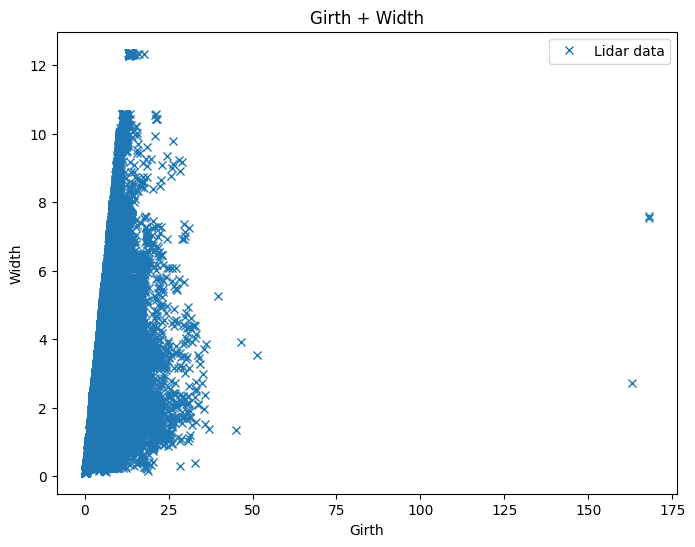

In [21]:
# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(feature_girth, feature_width, 'x', label='Lidar data')

# Add labels and title
plt.xlabel('Girth')
plt.ylabel('Width')
plt.title('Girth + Width')

# Add grid and legend
plt.legend()

# Show the plot
plt.show()

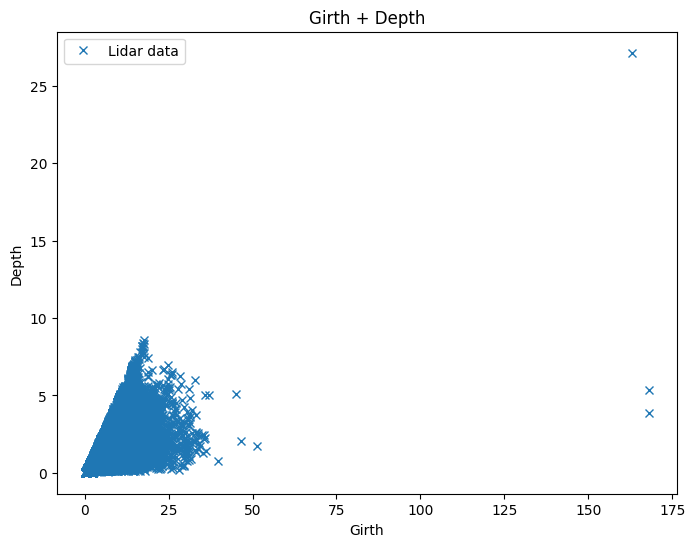

In [22]:
# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(feature_girth, feature_depth, 'x', label='Lidar data')

# Add labels and title
plt.xlabel('Girth')
plt.ylabel('Depth')
plt.title('Girth + Depth')

# Add grid and legend
plt.legend()

# Show the plot
plt.show()

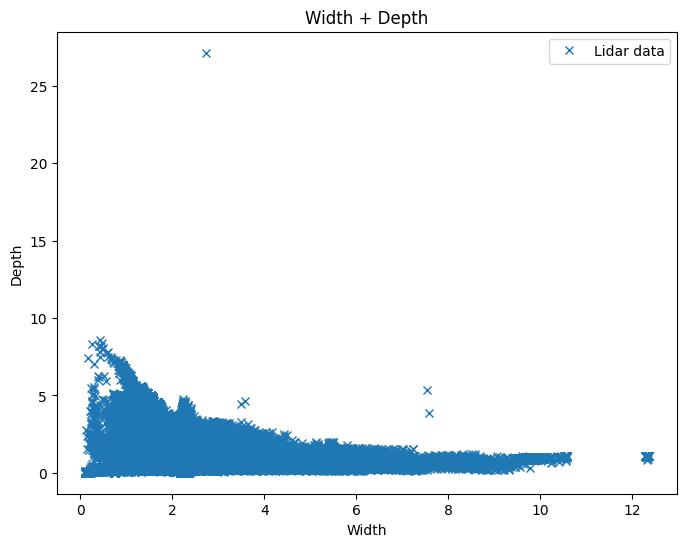

In [24]:
# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(feature_width, feature_depth, 'x', label='Lidar data')

# Add labels and title
plt.xlabel('Width')
plt.ylabel('Depth')
plt.title('Width + Depth')

# Add grid and legend
plt.legend()

# Show the plot
plt.show()

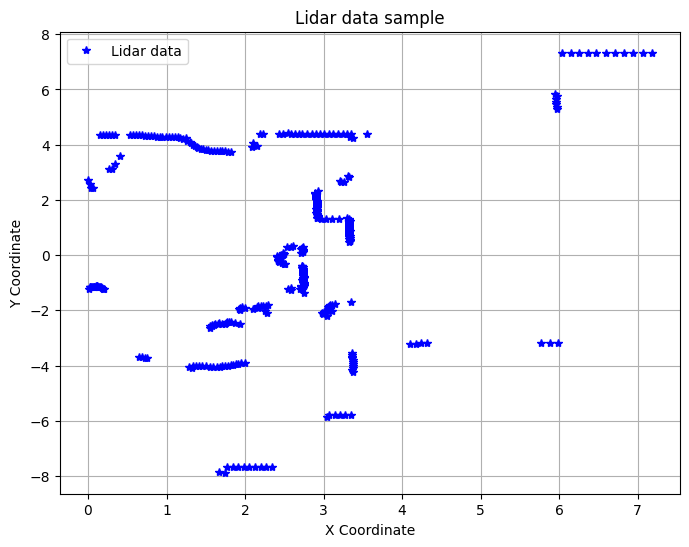

In [12]:

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x_train, y_train, '*',color='blue', label='Lidar data')

# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Lidar data sample')

# Add grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

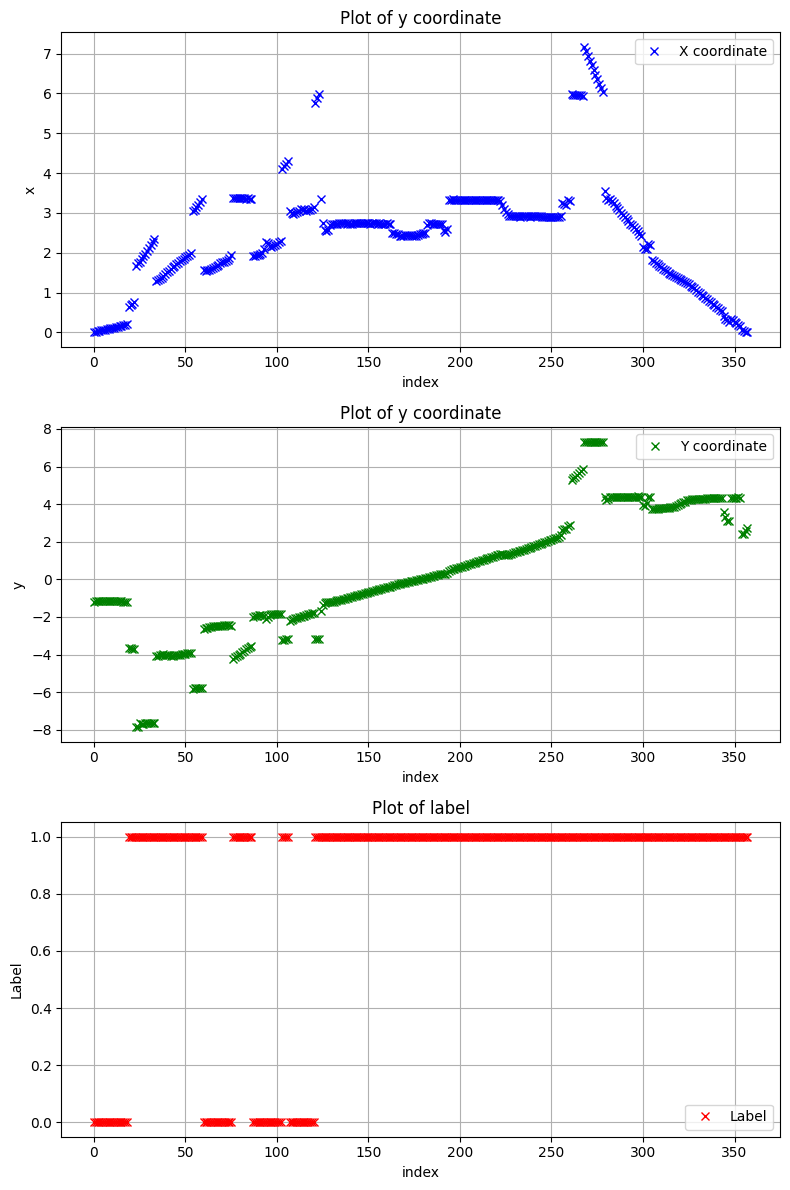

In [13]:

# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Plot the first array
axs[0].plot(x_train, 'x', color='blue', label='X coordinate')
axs[0].set_title('Plot of y coordinate')
axs[0].set_xlabel('index')
axs[0].set_ylabel('x')
axs[0].legend()
axs[0].grid(True)

# Plot the second array
axs[1].plot(y_train, 'x', color='green', label='Y coordinate')
axs[1].set_title('Plot of y coordinate')
axs[1].set_xlabel('index')
axs[1].set_ylabel('y')
axs[1].legend()
axs[1].grid(True)

# Plot the third array
axs[2].plot(label, 'x',color='red', label='Label')
axs[2].set_title('Plot of label')
axs[2].set_xlabel('index')
axs[2].set_ylabel('Label')
axs[2].legend()
axs[2].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [14]:
data_test = np.loadtxt('/content/drive/MyDrive/hoc_may_ung_dung/People2D_examples/data/testing.dat')
X_test = []
Y_test = []
Label_test = []
for i in range(len(data_test)):
  data_id = data_test[i,4:]
  x_test = data_id[0::3]
  y_test = data_id[1::3]
  label_test = data_id[2::3]

  mask = x_test <= 10
  x_test = x_test[mask]
  index_to_remove = np.where(~mask)[0]
  y_test = np.delete(y_test, index_to_remove)
  label_test = np.delete(label_test, index_to_remove)

  X_test.append(x_test)
  Y_test.append(y_test)

  Label_test.append(label_test)

X_test = np.concatenate(X_test)
Y_test = np.concatenate(Y_test)
Label_test = np.concatenate(Label_test)


In [20]:
np.shape(data_test)

(19497, 1084)

In [15]:
window_size = 30
num_sample = len(X_test)//window_size
feature_girth_test = np.zeros((num_sample), dtype=float)
feature_width_test = np.zeros((num_sample), dtype=float)
feature_depth_test = np.zeros((num_sample), dtype=float)
label_training_test = np.zeros((num_sample), dtype=float)
for i in range(num_sample):
      start_index = i * window_size
      end_index = (i + 1) * window_size
      x_window = X_test[start_index:end_index]
      y_window = Y_test[start_index:end_index]
      feature_girth_test[i] = calculate_girth(x_window, y_window)
      feature_width_test[i] = calculate_width(x_window, y_window)
      feature_depth_test[i] = calculate_depth(x_window, y_window)
      label_window_test = Label_test[start_index:end_index]
      mean_label_test = np.mean(label_window_test)
      label_training_test[i] = 1 if mean_label_test > 0.6 else 0

feature_test = np.vstack((feature_girth_test,feature_width_test,feature_depth_test))
feature_test = feature_test.T


In [42]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model_ft_knn = KNeighborsClassifier(n_neighbors=7)
model_ft_knn.fit(feature_training, label_training)
yfpred_knn = model_ft_knn.predict(feature_test)
print("Accuracy of KNN: %.2f%%" %(100 *accuracy_score(label_training_test, yfpred_knn)))

# Calculate precision, recall, and F1 score
precision = precision_score(label_training_test, yfpred_knn, average='binary')
recall = recall_score(label_training_test, yfpred_knn, average='binary')
f1 = f1_score(label_training_test, yfpred_knn, average='binary')

print("Precision of KNN: %.2f%%" % (100 *precision))
print("Recall of KNN: %.2f%%" % (100 *recall))
print("F1 Score of KNN: %.2f%%" % (100 *f1))

Accuracy of KNN: 93.88%
Precision of KNN: 96.05%
Recall of KNN: 96.51%
F1 Score of KNN: 96.28%


In [43]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
rf_model = RandomForestClassifier(n_estimators=100, random_state=20)

rf_model.fit(feature_training, label_training)

test_pred = rf_model.predict(feature_test)


test_accuracy = accuracy_score(label_training_test, test_pred)
print("Accuracy: %.2f %%" %(100*accuracy_score(label_training_test, test_pred)))

# Calculate precision, recall, and F1 score
precision = precision_score(label_training_test, test_pred, average='binary')
recall = recall_score(label_training_test, test_pred, average='binary')
f1 = f1_score(label_training_test, test_pred, average='binary')

print("Precision of RFC: %.2f%%" % (100 *precision))
print("Recall of RFC: %.2f%%" % (100 *recall))
print("F1 Score of RFC:%.2f%%" % (100 *f1))

Accuracy: 94.47 %
Precision of RFC: 96.67%
Recall of RFC: 96.58%
F1 Score of RFC:96.63%


In [44]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the model
clf = HistGradientBoostingClassifier(max_iter=200)
clf.fit(feature_training, label_training)

# Make predictions on the test set
ypred_hgb = clf.predict(feature_test)

# Calculate accuracy
accuracy = accuracy_score(label_training_test, ypred_hgb)
print("Accuracy: %.2f%%" % (100 * accuracy))

# Calculate precision, recall, and F1 score
precision = precision_score(label_training_test, ypred_hgb, average='binary')
recall = recall_score(label_training_test, ypred_hgb, average='binary')
f1 = f1_score(label_training_test, ypred_hgb, average='binary')

print("Precision: %.2f%%" % (100 * precision))
print("Recall: %.2f%%" % (100 * recall))
print("F1 Score: %.2f%%" % (100 * f1))


Accuracy: 92.13%
Precision: 94.35%
Recall: 96.15%
F1 Score: 95.24%


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

clf = DecisionTreeClassifier(random_state=42)
clf.fit(feature_training, label_training)

y_pred = clf.predict(feature_test)

accuracy = accuracy_score(label_training_test, y_pred)
precision = precision_score(label_training_test, y_pred, average='binary')
recall = recall_score(label_training_test, y_pred,average='binary')
f1 = f1_score(label_training_test, y_pred,average='binary')

print("Accuracy: %.2f%%" % (accuracy * 100))
print("Precision: %.2f%%" % (precision * 100))
print("Recall: %.2f%%" % (recall * 100))
print("F1 Score: %.2f%%" % (f1 * 100))


Accuracy: 92.84%
Precision: 95.51%
Recall: 95.76%
F1 Score: 95.64%
